<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Tipología y ciclo de la vida de los datos</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Practica 2: Limpieza y validación de los datos
Autores: 
*   Adrián García Rodriguez
*   Tomás Jesús Luna López



# 1. Descripción del proyecto

En los últimos años hemos visto gestas deportivas que podían parecer imprevisibles, cómo por ejemplo la consecución del título de la Premier Ligue por parte del Leicester C.F., o el título de la NBA de los Toronto Raptors, un equipo que no hace tanto era el peor de su división.

Además, en los últimos tiempos han proliferado las casas de apuestas, y aunque no nos posicionamos a favor de las apuestas y sabemos el gran problema que supone la ludopatía, ¿seríamos capaces de predecir los resultados mejor que las casas de apuestas y ganarles en su propio juego?

Supongamos que queremos ser capaces de ajustar un modelo para predecir resultados deportivos, y si el modelo es lo suficientemente preciso, realizar apuestas deportivas en función de las recomendaciones del sistema. Aunque para esto podríamos elegir muchas disciplinas deportivas como el baloncesto o el tenis, para nuestro caso hemos elegido el futbol, concretamente La Liga española.

Para ello, suponemos que los jugadores disponibles de cada equipo, así como su desempeño a lo largo de la temporada, pueden ayudarnos en esta tarea. Por ejemplo, para dos equipos de calidad similar, si un equipo tiene disponibles jugadores que han estado jugando muy bien y el otro equipo tiene jugadores con mala racha de partidos, el modelo debería predecir que ganará el primero.

 El objetivo final sería tener un resultado estimado para cada partido (victoria local, empate, o derrota local), con una probabilidad para cada resultado. Posteriormente compararíamos nuestras probabilidades con las cuotas ofertadas por las casas de apuestas, y en caso de que en los testeos el modelo hubiese resultado robusto, apostaríamos en las apuestas que tuvieran más esperanza matemática.

# 2 Descripción del dataset
El segundo dataset muestra el detalle de cada partido disputado por los diferentes jugadores que han participado en la actual edición de LaLiga. Este dataset está dividido en siete secciones.

*  Datos del partido. Fecha en la que se disputo el partido, día de la semana, si el partido se jugo en casa o como visitante, el resultado, equipo rival, minutos disputados y la/s posición/es que ha jugado dicho jugador en el encuentro.
*  Datos de rendimiento. Muestra las estadísticas generales del partido como son, los goles anotados, asistencias, penaltis, disparos, disparos a puerta, tarjetas recibidas, toques al balón, número de veces que acudió a la presión, entradas e intercepciones. 
*  Expectativa. Datos que muestras los goles y asistencias que se esperan del jugador en el partido teniendo en cuenta los datos anteriores.
*  Acciones. Datos que representan la cantidad de acciones de peligro que generó el jugador en dicho encuentro.
*  Pases. Muestra los datos de la cantidad de pases realizados, el porcentaje de pases completados, la cantidad de pases progresiones y la cantidad de intercepciones realizadas.
*  Transportes. Estos datos hacen referencia a la cantidad de veces que el jugador ha realizado conducciones y cuantas de ellas han sido en zona peligrosa.
*  Dribles. Por último, tenemos los datos que hacen referencia a la cantidad de intento de regates realizados por el jugador y en cuantos de ellos ha salido victorioso.


## 2.1. Carga del conjunto de datos

In [ ]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import os
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import plotly.graph_objects as go
import pylab
import scipy.stats as stats
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import kstest
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score

plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
work_dir = os.path.abspath(os.getcwd())

In [ ]:
data = pd.read_csv(
    work_dir + "/Documents/GitHub/Tipologia_prac1/players_info.csv",
    sep=";", quotechar="'")
data.head()

equipo     jugador        date dayofweek     comp                round  \
0  Alavés  Luis Rioja  2021-08-14       Sáb  La Liga  Semana 1 de partido   
1  Alavés  Luis Rioja  2021-08-21       Sáb  La Liga  Semana 2 de partido   
2  Alavés  Luis Rioja  2021-08-27       Vie  La Liga  Semana 3 de partido   
3  Alavés  Luis Rioja  2021-09-18       Sáb  La Liga  Semana 5 de partido   
4  Alavés  Luis Rioja  2021-09-22       Mié  La Liga  Semana 6 de partido   

       venue result   squad     opponent  ... passes_completed passes  \
0      Local  D 1–4  Alavés  Real Madrid  ...             12.0   16.0   
1      Local  D 0–1  Alavés     Mallorca  ...             12.0   25.0   
2  Visitante  D 0–3  Alavés     Valencia  ...             15.0   22.0   
3      Local  D 0–2  Alavés      Osasuna  ...             19.0   37.0   
4  Visitante  D 0–1  Alavés     Espanyol  ...             30.0   42.0   

   passes_pct  progressive_passes  carries  progressive_carries  \
0        75.0                 0.0     20.0                  4.0   
1        48.0                 0.0     27.0                  8.0   
2        68.2                 2.0     22.0                  4.0   
3        51.4                 1.0     36.0                  3.0   
4        71.4                 1.0     41.0                 12.0   

   dribbles_completed  dribbles         match_report  Unnamed: 40  
0                 1.0       1.0  Informe del partido          NaN  
1                 2.0       3.0  Informe del partido          NaN  
2                 2.0       4.0  Informe del partido          NaN  
3                 2.0       6.0  Informe del partido          NaN  
4                 3.0       4.0  Informe del partido          NaN  

[5 rows x 41 columns]

## 2.3. Exploración del Dataset

In [ ]:
print("Disponemos de {} variables con un total de {} muestras\nLos nombres de las variables son: {}"
      .format(len(data.columns), len(data), data.columns))
data.describe()

Disponemos de 41 variables con un total de 20460 muestras
Los nombres de las variables son: Index(['equipo', 'jugador', 'date', 'dayofweek', 'comp', 'round', 'venue',
       'result', 'squad', 'opponent', 'game_started', 'position', 'minutes',
       'goals', 'assists', 'pens_made', 'pens_att', 'shots_total',
       'shots_on_target', 'cards_yellow', 'cards_red', 'touches', 'pressures',
       'tackles', 'interceptions', 'blocks', 'xg', 'npxg', 'xa', 'sca', 'gca',
       'passes_completed', 'passes', 'passes_pct', 'progressive_passes',
       'carries', 'progressive_carries', 'dribbles_completed', 'dribbles',
       'match_report', 'Unnamed: 40'],
      dtype='object')


minutes         goals       assists     pens_made      pens_att  \
count  13639.000000  13661.000000  13627.000000  13661.000000  13661.000000   
mean      64.447174      0.090916      0.059661      0.009443      0.012005   
std       30.928286      0.325703      0.254491      0.101158      0.113519   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%       35.000000      0.000000      0.000000      0.000000      0.000000   
50%       79.000000      0.000000      0.000000      0.000000      0.000000   
75%       90.000000      0.000000      0.000000      0.000000      0.000000   
max      120.000000      4.000000      2.000000      2.000000      2.000000   

        shots_total  shots_on_target  cards_yellow     cards_red  \
count  13320.000000     13320.000000  13661.000000  13661.000000   
mean       0.802703         0.265541      0.155040      0.007906   
std        1.169523         0.597174      0.370946      0.088565   
min        0.000000         0.000000      0.000000      0.000000   
25%        0.000000         0.000000      0.000000      0.000000   
50%        0.000000         0.000000      0.000000      0.000000   
75%        1.000000         0.000000      0.000000      0.000000   
max       10.000000         6.000000      2.000000      1.000000   

            touches  ...           gca  passes_completed        passes  \
count  10415.000000  ...  10415.000000      10415.000000  10415.000000   
mean      37.713010  ...      0.128757         23.976476     30.346135   
std       24.038665  ...      0.395424         19.079643     21.709858   
min        0.000000  ...      0.000000          0.000000      0.000000   
25%       18.000000  ...      0.000000          9.000000     13.000000   
50%       36.000000  ...      0.000000         20.000000     27.000000   
75%       53.500000  ...      0.000000         34.000000     43.000000   
max      161.000000  ...      4.000000        143.000000    150.000000   

         passes_pct  progressive_passes       carries  progressive_carries  \
count  10313.000000        10415.000000  10415.000000         10415.000000   
mean      75.760070            1.937302     23.419683             2.495727   
std       16.370852            2.301586     17.132737             2.942826   
min        0.000000            0.000000      0.000000             0.000000   
25%       66.700000            0.000000     10.000000             0.000000   
50%       78.300000            1.000000     20.000000             2.000000   
75%       86.700000            3.000000     33.000000             4.000000   
max      100.000000           22.000000    133.000000            32.000000   

       dribbles_completed      dribbles  Unnamed: 40  
count        10415.000000  10415.000000          0.0  
mean             0.540663      0.998656          NaN  
std              0.970396      1.510922          NaN  
min              0.000000      0.000000          NaN  
25%              0.000000      0.000000          NaN  
50%              0.000000      0.000000          NaN  
75%              1.000000      1.000000          NaN  
max             10.000000     17.000000          NaN  

[8 rows x 28 columns]

# 3. Limpieza de los datos

## 3.1 Tipos de datos

In [ ]:
data.dtypes

equipo                  object
jugador                 object
date                    object
dayofweek               object
comp                    object
round                   object
venue                   object
result                  object
squad                   object
opponent                object
game_started            object
position                object
minutes                float64
goals                  float64
assists                float64
pens_made              float64
pens_att               float64
shots_total            float64
shots_on_target        float64
cards_yellow           float64
cards_red              float64
touches                float64
pressures              float64
tackles                float64
interceptions          float64
blocks                 float64
xg                     float64
npxg                   float64
xa                     float64
sca                    float64
gca                    float64
passes_completed       float64
passes  

Vemos que varios tipos de datos estan mal seteados, asi que procedemos a modificarlo.

In [ ]:
change_columns = ['date']
for col in change_columns:
    data[col] = pd.to_datetime(data[col])

## 3.2 Valores vacíos

In [ ]:
data.isna().sum()

equipo                     0
jugador                    0
date                    1455
dayofweek               1455
comp                    1455
round                   1455
venue                   1455
result                  1455
squad                   1455
opponent                1455
game_started            1455
position                7772
minutes                 6821
goals                   6799
assists                 6833
pens_made               6799
pens_att                6799
shots_total             7140
shots_on_target         7140
cards_yellow            6799
cards_red               6799
touches                10045
pressures              10045
tackles                10045
interceptions           7140
blocks                 10045
xg                     10045
npxg                   10045
xa                     10045
sca                    10045
gca                    10045
passes_completed       10045
passes                 10045
passes_pct             10147
progressive_pa

Vemos que se ha producido un error al cargar el CSV y se ha generado una columna extra, 'Unname:40', así que procedemos a eliminarla. También eliminamos la columna 'match_report', que es un dato extraido de más.


In [ ]:
data = data.drop(['Unnamed: 40', 'match_report'], axis=1)

Por otro lado, podemos observar que hay mucho valores vacios en los siguientes campos:


*   <b>Date</b>. Estas filas estan compltamente vacías, con lo que procedemos a eliminarlas
*   <b>Position</b>. Estos valores corresponden a dos grupos, si el jugador a participado en el encuentro pero en una posicion no soportado en lo datos, mientras que si el jugador no ha disputado ningun minuto, al no haber participado en el encuentro, su posicion está vacía. Para el primer caso, vamos completar el campo con el valor UNK, para indica que es deconocida, mientras que en el segundo caso lo compltaremos con null.
*    El resto de valores son de estadisticas que el jugador no ha podido completar por diferentes motivos (poco tiempo de juego, por posicion, ...), estos valores se van a sustituir por 0 para facilitar las estadisticas posteriores.



In [ ]:
data.loc[(data['position'].isna()) & ~(data['minutes'].isna()), 'position']
# borrado de las filas vacias
data = data.drop(data.index[data['date'].isna()])
data.loc[data['position'].isna() & ~data['minutes'].isna(), 'position'] = 'UNK'
data.loc[data['position'].isna(), 'position'] = None
data.loc[data['goals'].isna() & ~data['minutes'].isna(), 'goals'] = 0
data.loc[data['assists'].isna() & ~data['minutes'].isna(), 'assists'] = 0
data.loc[data['pens_made'].isna() & ~data['minutes'].isna(), 'pens_made'] = 0
data.loc[data['pens_att'].isna() & ~data['minutes'].isna(), 'pens_att'] = 0
data.loc[data['shots_total'].isna() & ~data['minutes'].isna(), 'shots_total'] = 0
data.loc[data['shots_on_target'].isna() & ~data['minutes'].isna(), 'shots_on_target'] = 0
data.loc[data['cards_yellow'].isna() & ~data['minutes'].isna(), 'cards_yellow'] = 0
data.loc[data['cards_red'].isna() & ~data['minutes'].isna(), 'cards_red'] = 0
data.loc[data['touches'].isna() & ~data['minutes'].isna(), 'touches'] = 0
data.loc[data['pressures'].isna() & ~data['minutes'].isna(), 'pressures'] = 0
data.loc[data['tackles'].isna() & ~data['minutes'].isna(), 'tackles'] = 0
data.loc[data['interceptions'].isna() & ~data['minutes'].isna(), 'interceptions'] = 0
data.loc[data['blocks'].isna() & ~data['minutes'].isna(), 'blocks'] = 0
data.loc[data['xg'].isna() & ~data['minutes'].isna(), 'xg'] = 0
data.loc[data['npxg'].isna() & ~data['minutes'].isna(), 'npxg'] = 0
data.loc[data['xa'].isna() & ~data['minutes'].isna(), 'xa'] = 0
data.loc[data['sca'].isna() & ~data['minutes'].isna(), 'sca'] = 0
data.loc[data['gca'].isna() & ~data['minutes'].isna(), 'gca'] = 0
data.loc[data['passes_completed'].isna() & ~data['minutes'].isna(), 'passes_completed'] = 0
data.loc[data['passes'].isna() & ~data['minutes'].isna(), 'passes'] = 0
data.loc[data['passes_pct'].isna() & ~data['minutes'].isna(), 'passes_pct'] = 0
data.loc[data['progressive_passes'].isna() & ~data['minutes'].isna(), 'progressive_passes'] = 0
data.loc[data['carries'].isna() & ~data['minutes'].isna(), 'carries'] = 0
data.loc[data['progressive_carries'].isna() & ~data['minutes'].isna(), 'progressive_carries'] = 0
data.loc[data['dribbles_completed'].isna() & ~data['minutes'].isna(), 'dribbles_completed'] = 0
data.loc[data['dribbles'].isna() & ~data['minutes'].isna(), 'dribbles'] = 0

## 3.3 Valores átipicos
En este paso, para todas las variables númericas, vamos a buscar valores átipicos o extremos.

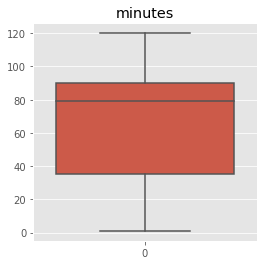

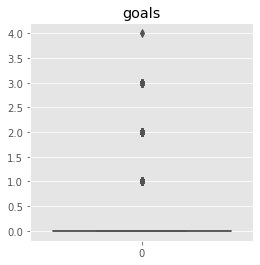

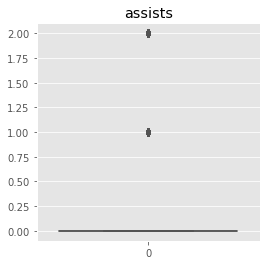

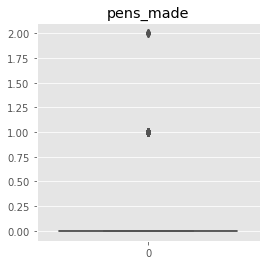

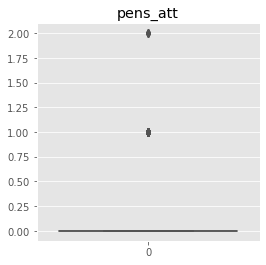

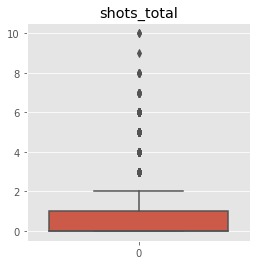

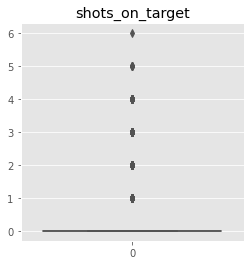

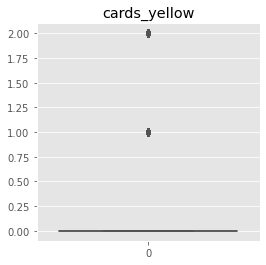

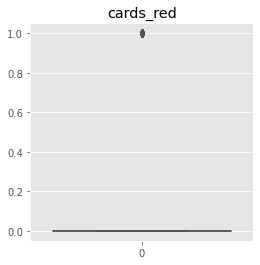

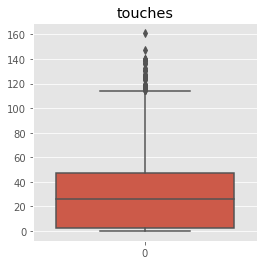

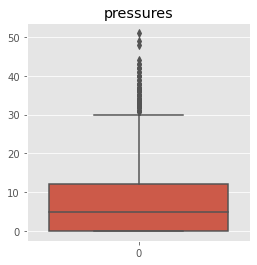

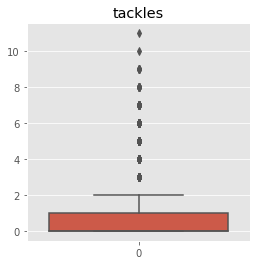

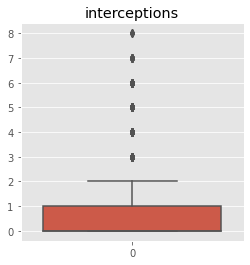

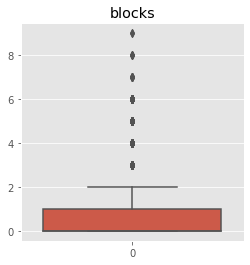

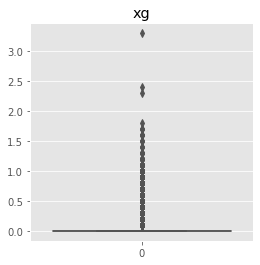

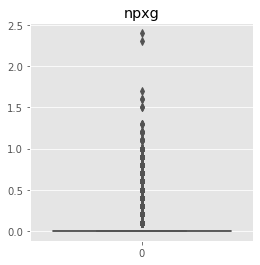

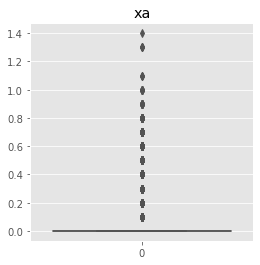

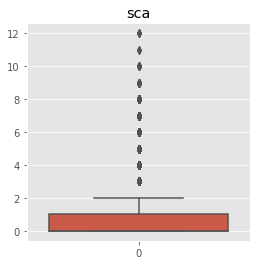

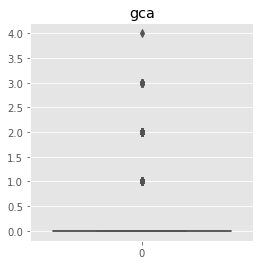

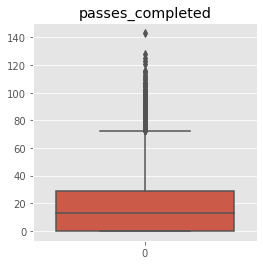

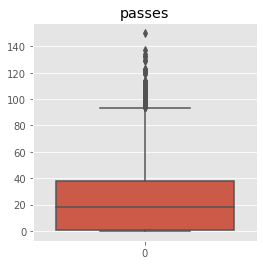

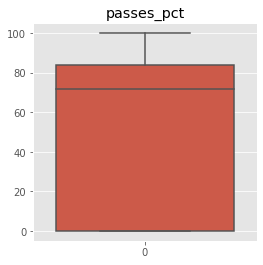

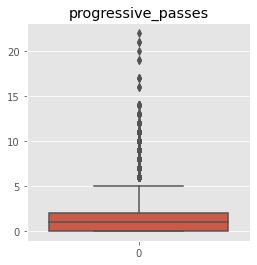

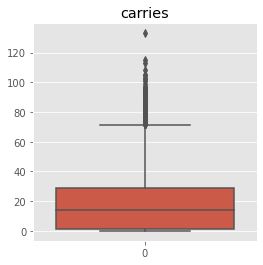

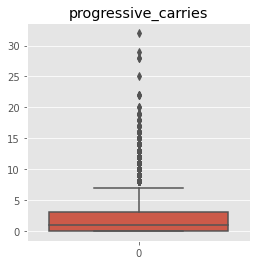

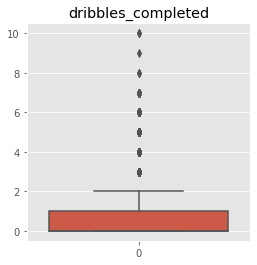

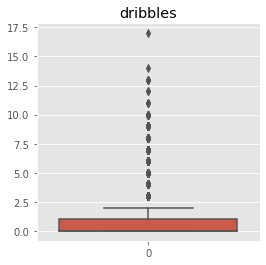

In [ ]:
# sns.boxplot(data['minutes'])
names = ['minutes', 'goals', 'assists', 'pens_made', 'pens_att', 'shots_total', 'shots_on_target', 'cards_yellow', 'cards_red', 'touches', 'pressures', 'tackles', 
         'interceptions', 'blocks', 'xg', 'npxg', 'xa', 'sca', 'gca', 'passes_completed', 'passes', 'passes_pct', 'progressive_passes', 'carries', 'progressive_carries', 'dribbles_completed', 'dribbles']
for i in range(len(names)):
  fig, ax = plt.subplots(1, figsize=(4, 4), sharey=True)
  sns.boxplot(ax=ax, data=data[names[i]])
  ax.set_title(names[i])

En muchos campos vemos varios valores atípicos, pero analizando los datos, son valores que entran dentro de los posible, por eso se decide mantener dichos datos.

# 4. Análisis de los datos

Hacemos histogramas de los datos para entender mejor las distribuciones de las distintas variables

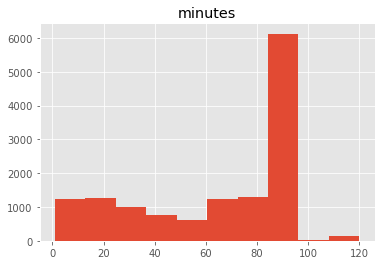

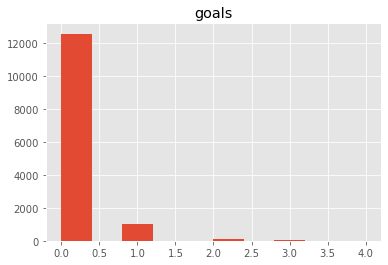

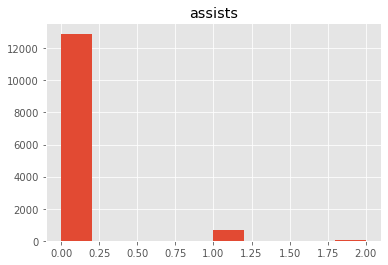

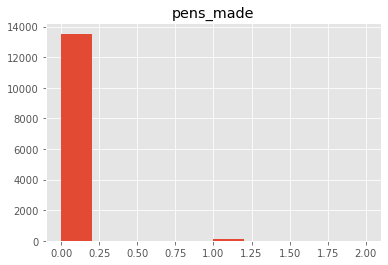

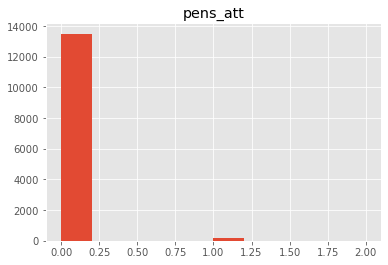

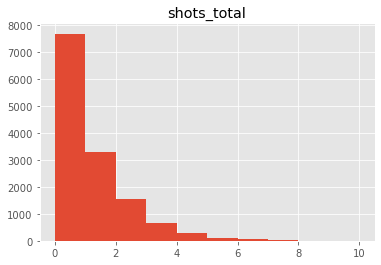

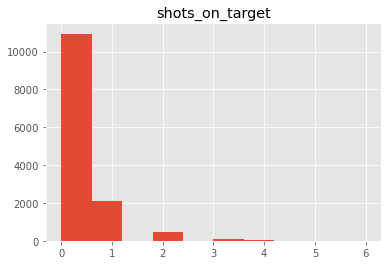

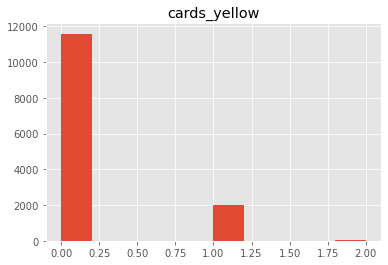

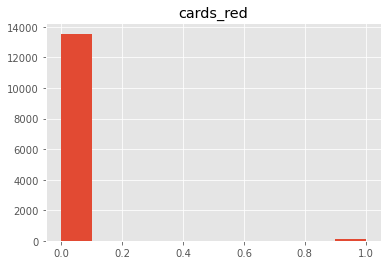

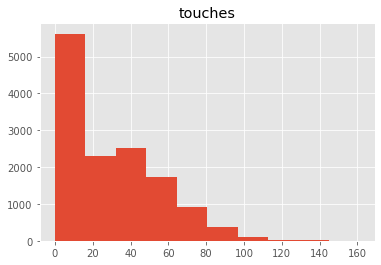

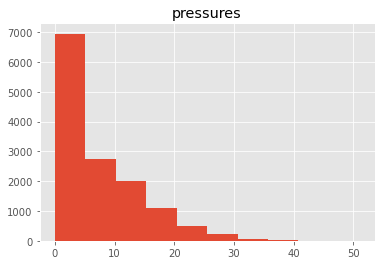

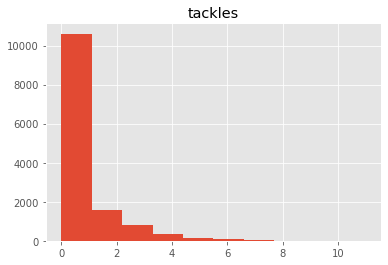

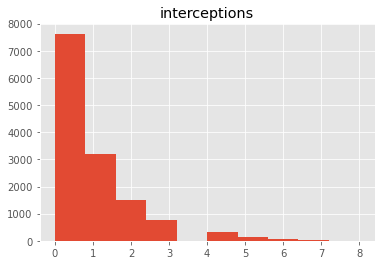

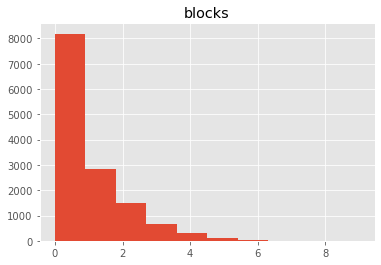

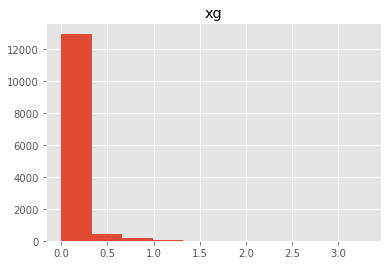

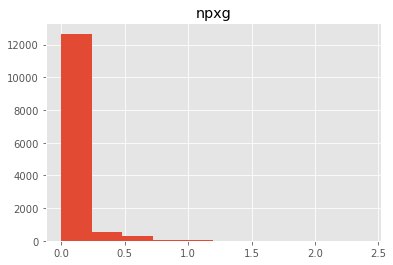

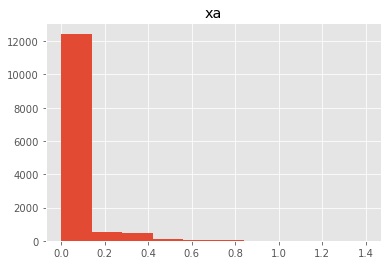

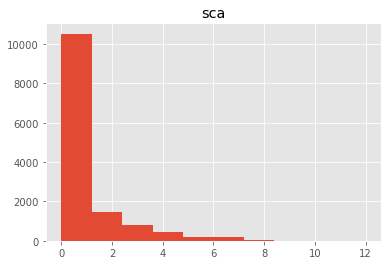

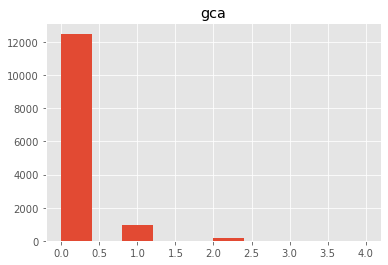

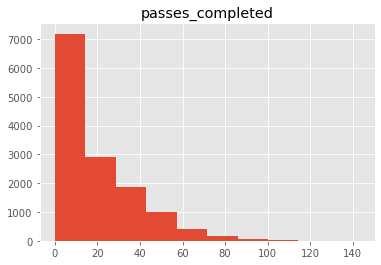

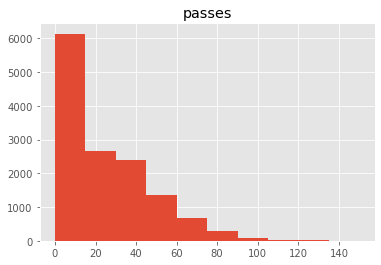

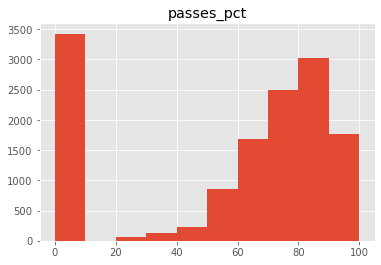

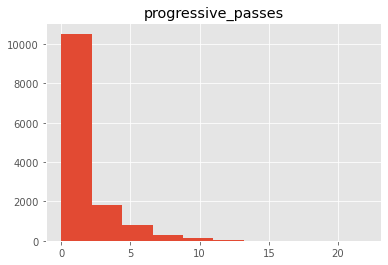

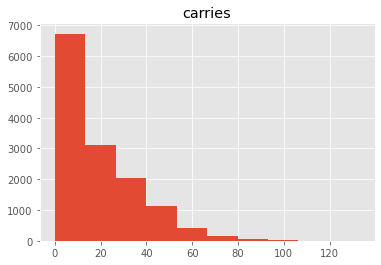

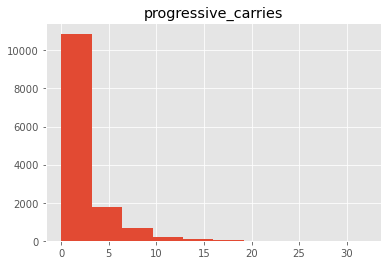

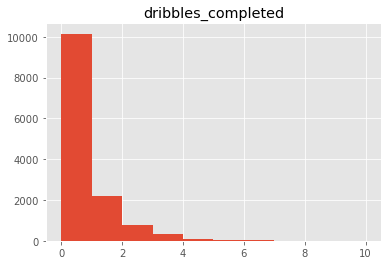

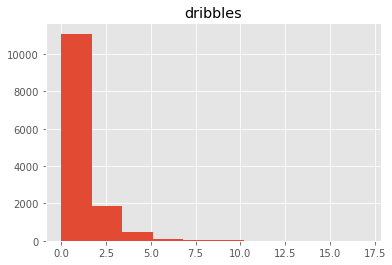

In [ ]:
for name in names:
    data.hist(column=name)

Podemos observar que estos datos están distorsionados por competiciones distintas a la Liga, filtramos.

In [ ]:
data_liga = data[data['comp'] == 'La Liga']

Creamos nuevas variables a partir de 'result' que serán un código para el resultado del partido y los goles a favor y en contra en nuevas columnas

In [ ]:
result_split = data_liga['result'].str.split(' ', expand=True)

In [ ]:
# resultado sólo cogiendo si gana, empata o pierde
data_liga['result_wdl'] = result_split.loc[:, 0]

In [ ]:
goals_split = result_split.loc[:, 1].str.split('–', expand=True)

In [ ]:
data_liga['goals_team'] = goals_split.loc[:, 0]
data_liga['goals_rival'] = goals_split.loc[:, 1]

data_liga['goals_team'] = data_liga['goals_team'].astype(int)
data_liga['goals_rival'] = data_liga['goals_rival'].astype(int)

Comprobamos que las nuevas columnas se hayan creado correctamente.

In [ ]:
data_liga.head()

equipo     jugador       date dayofweek     comp                round  \
0  Alavés  Luis Rioja 2021-08-14       Sáb  La Liga  Semana 1 de partido   
1  Alavés  Luis Rioja 2021-08-21       Sáb  La Liga  Semana 2 de partido   
2  Alavés  Luis Rioja 2021-08-27       Vie  La Liga  Semana 3 de partido   
3  Alavés  Luis Rioja 2021-09-18       Sáb  La Liga  Semana 5 de partido   
4  Alavés  Luis Rioja 2021-09-22       Mié  La Liga  Semana 6 de partido   

       venue result   squad     opponent  ... passes passes_pct  \
0      Local  D 1–4  Alavés  Real Madrid  ...   16.0       75.0   
1      Local  D 0–1  Alavés     Mallorca  ...   25.0       48.0   
2  Visitante  D 0–3  Alavés     Valencia  ...   22.0       68.2   
3      Local  D 0–2  Alavés      Osasuna  ...   37.0       51.4   
4  Visitante  D 0–1  Alavés     Espanyol  ...   42.0       71.4   

   progressive_passes  carries  progressive_carries  dribbles_completed  \
0                 0.0     20.0                  4.0                 1.0   
1                 0.0     27.0                  8.0                 2.0   
2                 2.0     22.0                  4.0                 2.0   
3                 1.0     36.0                  3.0                 2.0   
4                 1.0     41.0                 12.0                 3.0   

   dribbles  result_wdl  goals_team  goals_rival  
0       1.0           D           1            4  
1       3.0           D           0            1  
2       4.0           D           0            3  
3       6.0           D           0            2  
4       4.0           D           0            1  

[5 rows x 42 columns]

## 4.1 Selección de los grupos de datos que se quieren analizar/comparar (p. e., si se van a comparar grupos de datos, ¿cuáles son estos grupos y qué tipo de análisis se van a aplicar?)

Nuestro objetivo va a ser predecir el resultado de los partidos en función de distintas variables. Análizar todas las variables en detalle conllevaría mucho esfuerzo, por lo que para esta práctica nos vamos a centrar en la variable 'touches'.

In [ ]:
data_liga[data_liga['touches'].notna()].groupby(['squad', 'opponent', 'date']).mean()

minutes     goals   assists  \
squad      opponent        date                                        
Alavés     Athletic Club   2021-10-01  60.882353  0.000000  0.000000   
                           2022-01-09  68.666667  0.000000  0.000000   
           Atlético Madrid 2021-09-25  61.764706  0.058824  0.058824   
           Barcelona       2021-10-30  58.882353  0.058824  0.058824   
                           2022-01-23  72.000000  0.000000  0.000000   
...                                          ...       ...       ...   
Villarreal Real Madrid     2021-09-25  61.875000  0.000000  0.000000   
                           2022-02-12  61.875000  0.000000  0.000000   
           Real Sociedad   2021-12-18  61.875000  0.187500  0.187500   
           Sevilla         2021-12-04  61.875000  0.000000  0.000000   
           Valencia        2021-10-30  61.875000  0.000000  0.000000   

                                       pens_made  pens_att  shots_total  \
squad      opponent        date                                           
Alavés     Athletic Club   2021-10-01        0.0       0.0     1.058824   
                           2022-01-09        0.0       0.0     0.866667   
           Atlético Madrid 2021-09-25        0.0       0.0     0.411765   
           Barcelona       2021-10-30        0.0       0.0     0.176471   
                           2022-01-23        0.0       0.0     0.400000   
...                                          ...       ...          ...   
Villarreal Real Madrid     2021-09-25        0.0       0.0     0.375000   
                           2022-02-12        0.0       0.0     0.562500   
           Real Sociedad   2021-12-18        0.0       0.0     1.000000   
           Sevilla         2021-12-04        0.0       0.0     1.000000   
           Valencia        2021-10-30        0.0       0.0     0.687500   

                                       shots_on_target  cards_yellow  \
squad      opponent        date                                        
Alavés     Athletic Club   2021-10-01         0.235294      0.117647   
                           2022-01-09         0.066667      0.133333   
           Atlético Madrid 2021-09-25         0.058824      0.176471   
           Barcelona       2021-10-30         0.117647      0.117647   
                           2022-01-23         0.133333      0.000000   
...                                                ...           ...   
Villarreal Real Madrid     2021-09-25         0.125000      0.125000   
                           2022-02-12         0.125000      0.125000   
           Real Sociedad   2021-12-18         0.500000      0.187500   
           Sevilla         2021-12-04         0.125000      0.125000   
           Valencia        2021-10-30         0.062500      0.250000   

                                       cards_red    touches  ...  \
squad      opponent        date                              ...   
Alavés     Athletic Club   2021-10-01        0.0  32.000000  ...   
                           2022-01-09        0.0  35.533333  ...   
           Atlético Madrid 2021-09-25        0.0  23.705882  ...   
           Barcelona       2021-10-30        0.0  20.411765  ...   
                           2022-01-23        0.0  26.800000  ...   
...                                          ...        ...  ...   
Villarreal Real Madrid     2021-09-25        0.0  42.312500  ...   
                           2022-02-12        0.0  37.687500  ...   
           Real Sociedad   2021-12-18        0.0  39.687500  ...   
           Sevilla         2021-12-04        0.0  39.000000  ...   
           Valencia        2021-10-30        0.0  44.187500  ...   

                                       passes_completed     passes  \
squad      opponent        date                                      
Alavés     Athletic Club   2021-10-01         17.941176  23.823529   
                           2022-01-09         17.066667  27.333333   
           Atlético Madrid

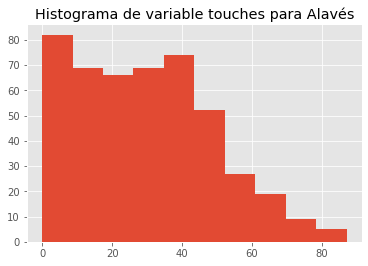

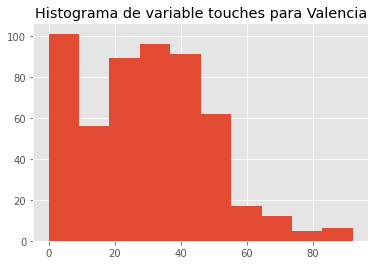

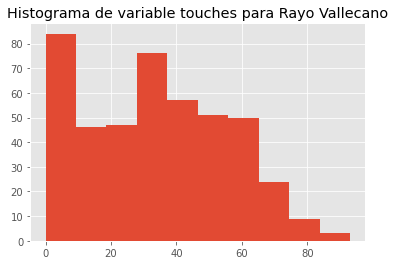

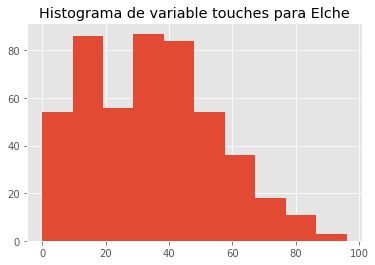

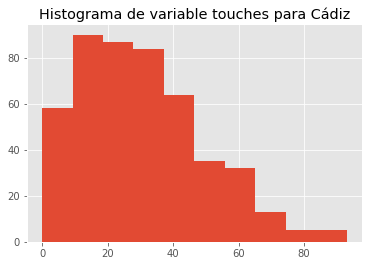

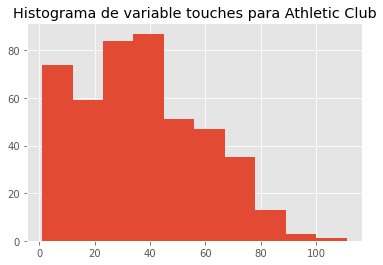

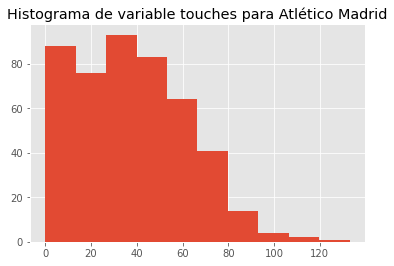

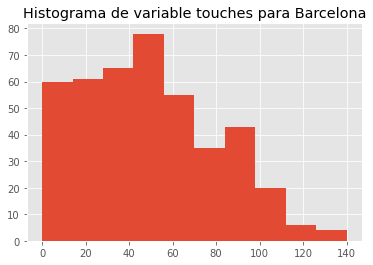

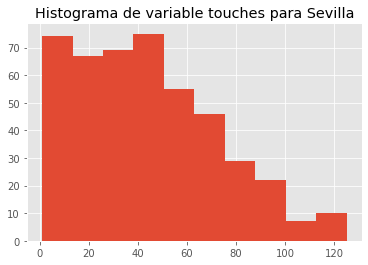

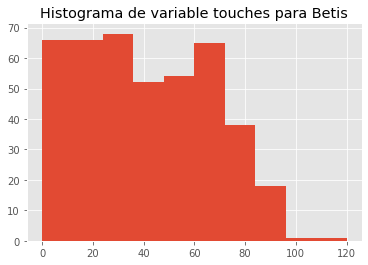

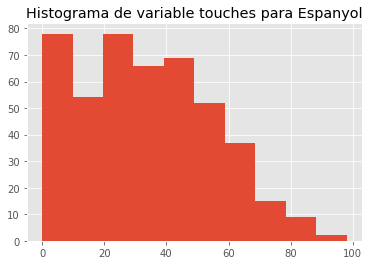

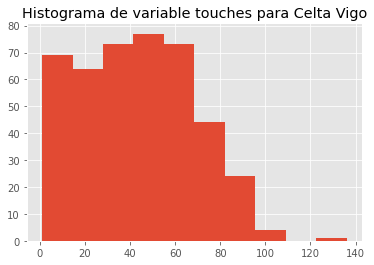

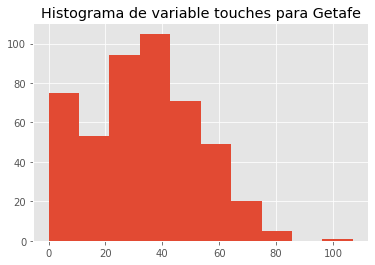

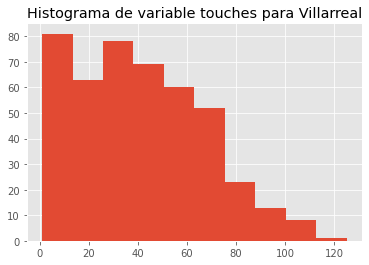

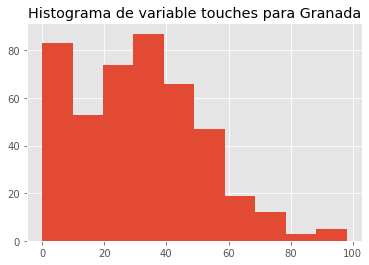

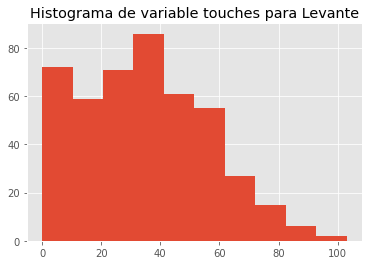

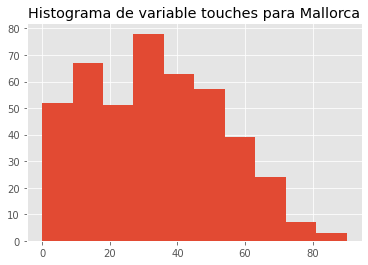

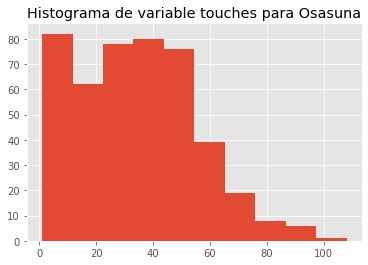

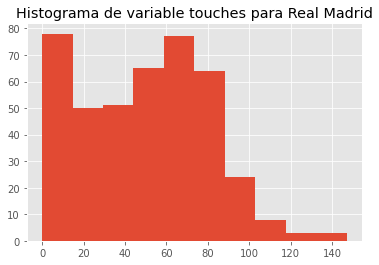

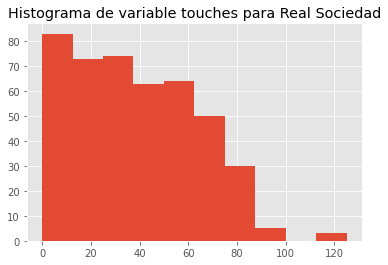

In [ ]:
list_teams = data_liga['squad'].unique()
for team in list_teams:
    data_filt = data_liga[data_liga['squad'] == team]
    plt.hist(data_filt[data_filt['touches'].notna()]['touches'])
    plt.title('Histograma de variable touches para ' + team)
    pyplot.show()


Analizando los gráficos no parece que siga una distribución normal, quizás una chi-cuadrado, aún así lo comprobaremos para la variables 'touches'.

## 4.2 Comprobación de la normalidad y homogeneidad de la varianza.

Primero usemos método gráficos, veamos por los gráficos Q-Q plot si nuestra variable touches es normal para los distintos grupos (equipos)

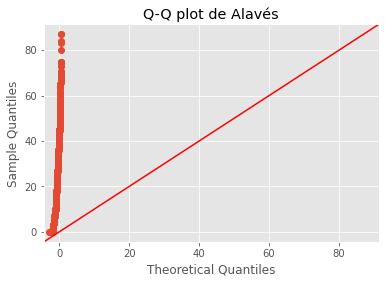

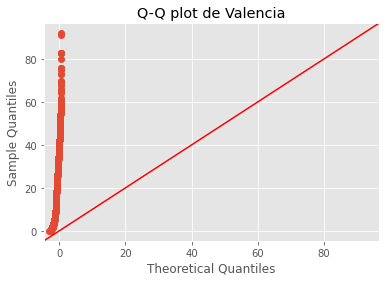

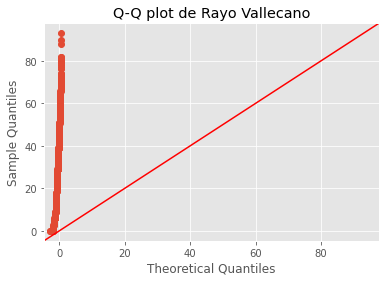

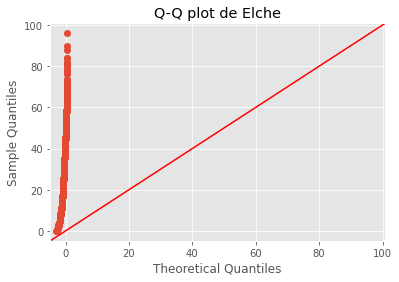

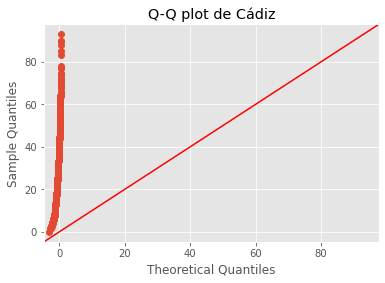

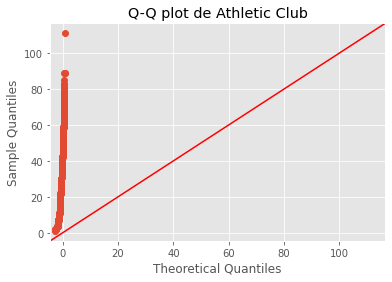

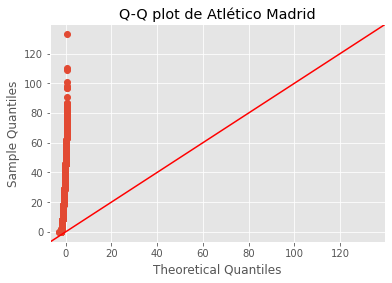

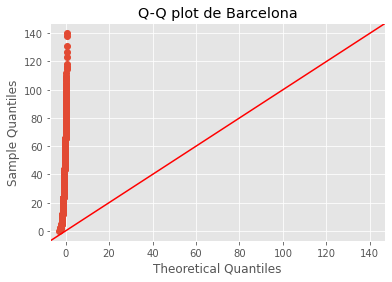

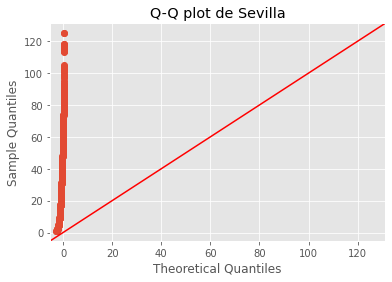

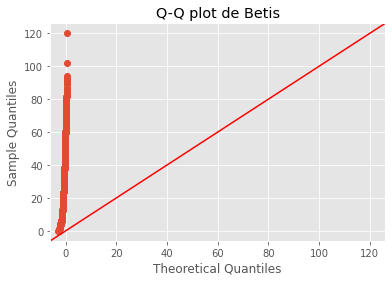

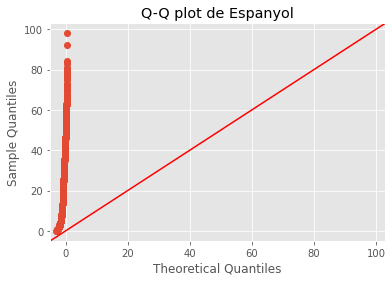

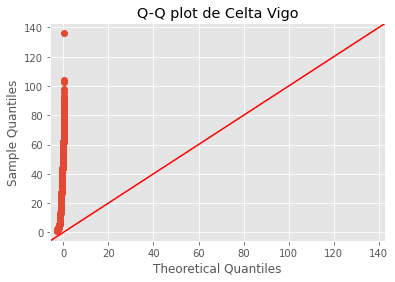

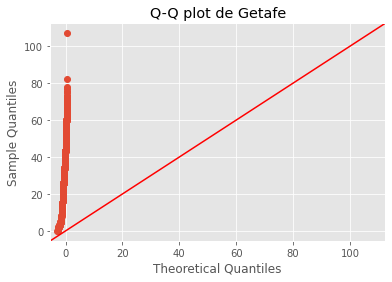

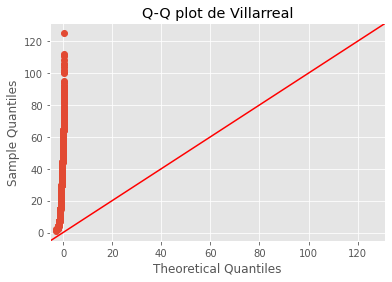

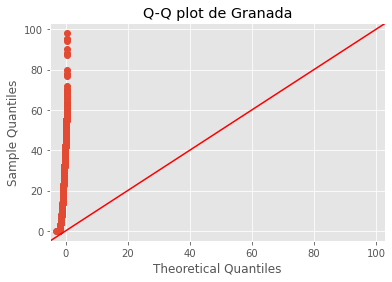

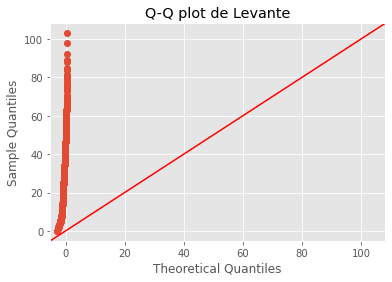

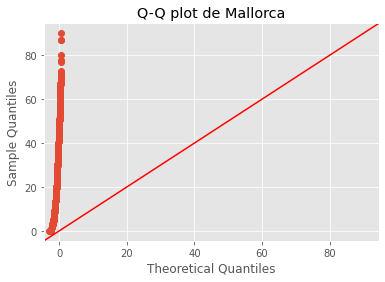

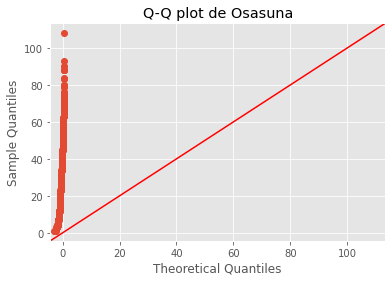

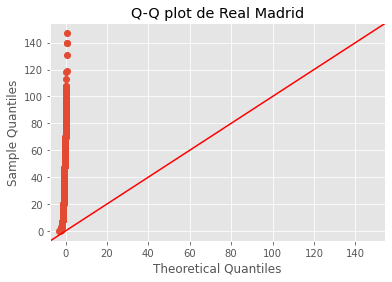

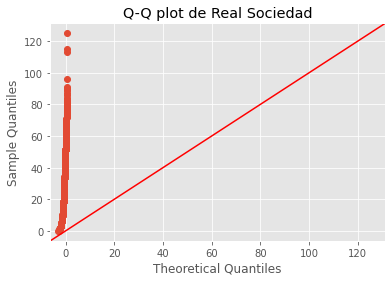

In [ ]:
for team in list_teams:
    qqplot(data_liga[data_liga['squad'] == team]['touches'], line='45')
    plt.title('Q-Q plot de ' + team)
    pyplot.show()

En los gráficos aparece una linea diagonal roja, la cercanía de los puntos a esa línea muestra la similitud con una distribución normal, cómo podemos ver en este caso los puntos están muy alejados, por lo que nuestras distribuciones no se parecen a las de una dist normal.

Veamos los totales, sin importar equipo.

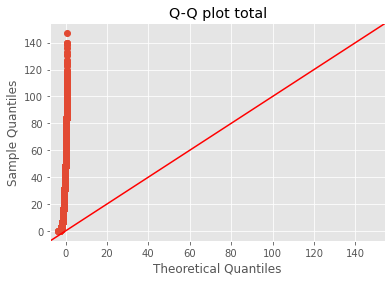

In [ ]:
qqplot(data_liga['touches'], line='45')
plt.title('Q-Q plot ' + 'total')
pyplot.show()

Mismo resultado, muy alejado de una distribución normal.

#### Veamos por Shapiro-Wilk

In [ ]:
alpha = 0.05
for team in list_teams:
    display('-'*10 + team + '-'*10)
    stat, p = shapiro(data_liga[data_liga['squad'] == team]['touches'].dropna())
    display('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        display('Los datos parecen seguir una normal (no rechazamos H0)')
    else:
        display('Los datos no parecen seguir una normal (rechazamos H0)')

'----------Alavés----------'

'Statistics=0.967, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Valencia----------'

'Statistics=0.969, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Rayo Vallecano----------'

'Statistics=0.968, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Elche----------'

'Statistics=0.975, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Cádiz----------'

'Statistics=0.955, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Athletic Club----------'

'Statistics=0.969, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Atlético Madrid----------'

'Statistics=0.973, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Barcelona----------'

'Statistics=0.968, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Sevilla----------'

'Statistics=0.959, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Betis----------'

'Statistics=0.962, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Espanyol----------'

'Statistics=0.968, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Celta Vigo----------'

'Statistics=0.976, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Getafe----------'

'Statistics=0.979, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Villarreal----------'

'Statistics=0.966, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Granada----------'

'Statistics=0.969, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Levante----------'

'Statistics=0.970, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Mallorca----------'

'Statistics=0.974, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Osasuna----------'

'Statistics=0.972, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Real Madrid----------'

'Statistics=0.967, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Real Sociedad----------'

'Statistics=0.962, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

Podemos ver cómo en todos los casos rechazamos H0, por lo que no aceptamos la hipótesis de normalidad, por Shapiro-Wilk.

#### Veamos por Kolmogorov-Smirnov

In [ ]:
for team in list_teams:
    display('-'*10 + team + '-'*10)
    stat, p = kstest(data_liga[data_liga['squad'] == team]['touches'].dropna(), 'norm')
    display('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        display('Los datos parecen seguir una normal (no rechazamos H0)')
    else:
        display('Los datos no parecen seguir una normal (rechazamos H0)')

'----------Alavés----------'

'Statistics=0.933, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Valencia----------'

'Statistics=0.961, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Rayo Vallecano----------'

'Statistics=0.943, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Elche----------'

'Statistics=0.984, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Cádiz----------'

'Statistics=0.990, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Athletic Club----------'

'Statistics=0.983, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Atlético Madrid----------'

'Statistics=0.945, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Barcelona----------'

'Statistics=0.978, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Sevilla----------'

'Statistics=0.979, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Betis----------'

'Statistics=0.978, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Espanyol----------'

'Statistics=0.968, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Celta Vigo----------'

'Statistics=0.980, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Getafe----------'

'Statistics=0.980, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Villarreal----------'

'Statistics=0.981, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Granada----------'

'Statistics=0.939, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Levante----------'

'Statistics=0.985, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Mallorca----------'

'Statistics=0.969, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Osasuna----------'

'Statistics=0.981, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Real Madrid----------'

'Statistics=0.966, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

'----------Real Sociedad----------'

'Statistics=0.974, p=0.000'

'Los datos no parecen seguir una normal (rechazamos H0)'

Los resultados son equivalentes al realizar el test K-S, por tanto, a raiz de estos dos test, los gráficos Q-Q plot y los gráficos de las distibuciones, podemos suponer que estos datos no siguen una distribución normal.

Aún así por el TCL podríamos asumir normalidad, ya que en cada grupo de datos tenemos 38 registros (los partidos que juega cada equipo de la liga).

### comprobemos la homocesdasticidad

Text(0, 0.5, 'equipos')

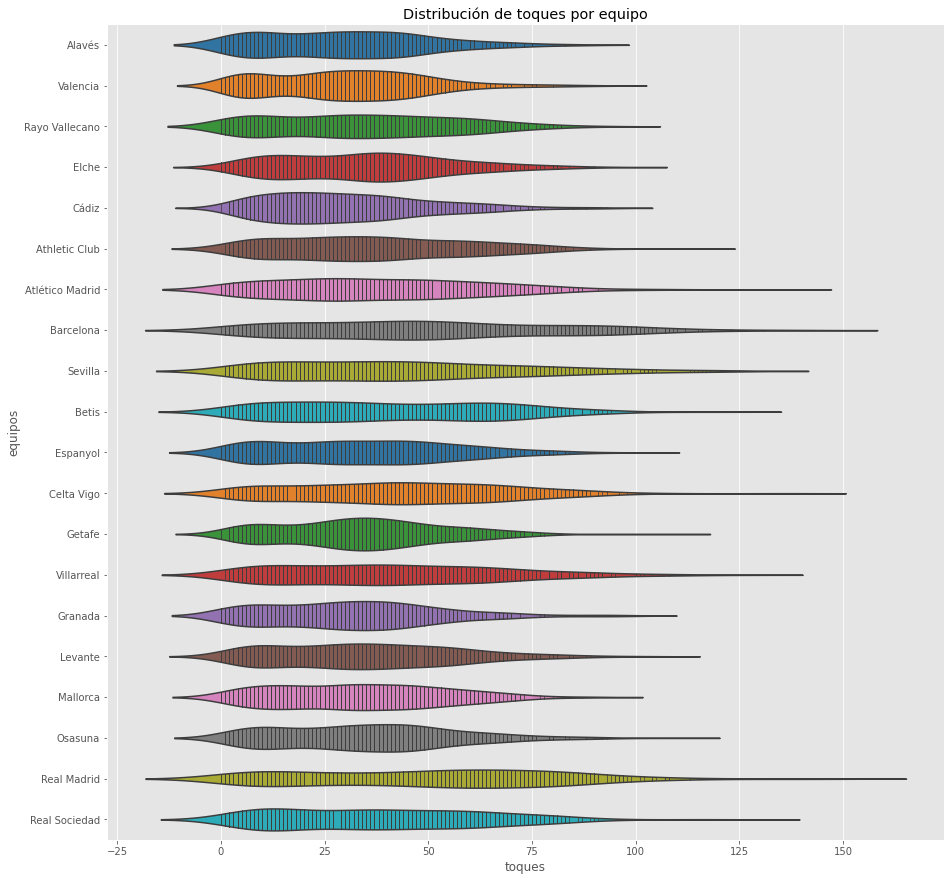

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
sns.violinplot(
    x='touches',
    y='squad',
    data=data_liga[['squad', 'touches']],
    palette='tab10',
    inner='stick',
    ax=ax
)
ax.set_title('Distribución de toques por equipo')
ax.set_xlabel('toques')
ax.set_ylabel('equipos')

Gráficamente se aprecian diferentes varianzas, probemos el test de Levene.
Comparamos real Madrid y Alavés ya que son los equipos más distintos entre sí. Para el test de Levene necesitamos normalidad en los datos, si seguimos el TCL podríamos utilizarlo

In [ ]:
levene = stats.levene(data_liga[data_liga['squad'] == 'Real Madrid']['touches'].dropna(),
                      data_liga[data_liga['squad'] == 'Alavés']['touches'].dropna(),
                      center='median')
levene

LeveneResult(statistic=100.19438422713047, pvalue=1.9936422942922807e-22)

Para Fligner no necesitamos asumir normalidad.

In [ ]:
fligner = stats.fligner(data_liga[data_liga['squad'] == 'Real Madrid']['touches'].dropna(),
                      data_liga[data_liga['squad'] == 'Alavés']['touches'].dropna(),
                      center='median')
fligner

FlignerResult(statistic=91.67335419993316, pvalue=1.022322429029273e-21)

Con un p-valor tan bajo la hipótesis nula de homocedasticidad es rechazada, por lo que asumimos heterocedasticidad, tanto por Levene cómo por fligner.

Veamos para dos equipos que parecen tener varianzas más parecidas: Valencia y Alavés.

In [ ]:
levene = stats.levene(data_liga[data_liga['squad'] == 'Valencia']['touches'].dropna(),
                      data_liga[data_liga['squad'] == 'Alavés']['touches'].dropna(),
                      center='median')
levene

LeveneResult(statistic=2.172324080547266, pvalue=0.14082688354309902)

Para los equipos Valencia y Alavés podemos ver que por el test de Levene tendríamos homocedasticidad. 

In [ ]:
fligner = stats.fligner(data_liga[data_liga['squad'] == 'Valencia']['touches'].dropna(),
                      data_liga[data_liga['squad'] == 'Alavés']['touches'].dropna(),
                      center='median')
fligner

FlignerResult(statistic=2.2347102071038027, pvalue=0.13494192195422858)

Por el test de fligner los resultados son equivalentes.  Probemos un test ANOVA.

In [ ]:
stats.f_oneway(data_liga[data_liga['squad'] == 'Alavés']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Valencia']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Rayo Vallecano']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Elche']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Cádiz']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Athletic Club']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Atlético Madrid']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Barcelona']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Sevilla']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Betis']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Espanyol']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Celta Vigo']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Getafe']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Villarreal']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Granada']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Levante']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Mallorca']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Osasuna']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Real Madrid']['touches'].dropna(),
               data_liga[data_liga['squad'] == 'Real Sociedad']['touches'].dropna(),)

F_onewayResult(statistic=29.301055737626797, pvalue=1.460256474113258e-102)

Podemos ver que por el test ANOVA también rechazamos la hipótesis nula de homocedasticidad, por lo que decimos que hay una diferencia estadísticamente significativa entre los grupos.

## 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.

Vamos a probar a predecir el resultado del partido (Derrota, Empate o Victoria) en función de variables del propio partido y de los jugadores. También probaremos a predecir la diferencia de goles esperada.
Para ello en primer comprobaremos la correlación entre ambas variables.

Creamos una nueva variable diferencia de goles e analizamos su correlación

In [ ]:
data_liga['goals_diff'] = data_liga['goals_team'] - data_liga['goals_rival']
data_liga[data_liga['minutes'].notna()].groupby(['squad', 'opponent', 'date']).mean()['touches'].corr(data_liga[data_liga['minutes'].notna()].groupby(['squad', 'opponent', 'date']).mean()['goals_diff'])

0.21096928560889944

Valores positivos significan correlación positiva, es decir, a mayor número de pases mayor diferencia de goles, sin embargo la relación no es demasiado fuerte, ya que es un valor pequeño

In [ ]:
data_liga[data_liga['minutes'].notna()].groupby(['squad', 'opponent', 'date']).mean()['passes_pct'].corr(data_liga[data_liga['minutes'].notna()].groupby(['squad', 'opponent', 'date']).mean()['goals_diff'])

0.09468895319381793

La variable porcentaje de pases acertados está también positivamente correlacionada pero con muy poca fuerza.

Creamos los datasets necesarios para entrenar nuestro modelo. Vamos a filtar sólo por los jugadores que hayan jugado más de 10 minutos, que serán los que más impacto hayan tenido en el partido.

In [ ]:
X = data_liga[data_liga['minutes'] > 10].groupby(['squad', 'opponent', 'date', 'result_wdl']).mean()[['touches', 'passes_pct', 'shots_on_target', 'dribbles_completed', 'passes_completed', 'pressures', 'tackles', 'interceptions', 'blocks', 'progressive_passes', 'carries', 'progressive_carries']]
y = data_liga[data_liga['minutes'] > 10].groupby(['squad', 'opponent', 'date', 'result_wdl']).mean()['goals_diff']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

Ajustamos una regresión lineal para predecir la diferencia de goles

In [ ]:
lin_regression = LinearRegression()
lin_regression.fit(X_train,y_train)
y_pred = lin_regression.predict(X_test)

In [ ]:
r_sq = lin_regression.score(X_test, y_test)
display(f"R cuadrado: {r_sq}")

'R cuadrado: 0.310679450653208'

Veamos el error de las predicciones:

In [ ]:
y_pred - y_test

squad           opponent       date        result_wdl
Valencia        Alavés         2022-02-13  D             0.515451
Real Sociedad   Athletic Club  2021-10-31  E            -0.106910
Real Madrid     Getafe         2022-01-02  D             1.464688
Granada         Getafe         2022-01-20  D             2.067274
Athletic Club   Cádiz          2021-11-05  D             1.835066
                                                           ...   
Alavés          Celta Vigo     2021-11-27  D             0.980321
Rayo Vallecano  Celta Vigo     2022-02-05  D             0.948345
Valencia        Espanyol       2021-12-31  D             0.323805
Mallorca        Real Madrid    2021-09-22  D             4.319592
Villarreal      Espanyol       2021-08-21  E            -1.071451
Name: goals_diff, Length: 171, dtype: float64

La regresión lineal no va muy bien, probelmos una regresión logística multinomial para intentar predecir quien gana el partido

In [ ]:
X_log = data_liga[data_liga['minutes'] > 10].groupby(['squad', 'opponent', 'date', 'result_wdl']).mean()[['passes_pct', 'touches','shots_on_target', 'dribbles_completed', 'passes_completed', 'pressures', 'tackles', 'interceptions', 'blocks', 'progressive_passes', 'carries', 'progressive_carries', 'xg', 'npxg', 'xa', 'sca']]
y_log = data_liga[data_liga['minutes'] > 10].groupby(['squad', 'opponent', 'date', 'result_wdl'] , as_index = False).mean()['result_wdl']

Ajustamos el modelo y validamos por validación cruzada

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_log, y_log, scoring='accuracy', cv=cv, n_jobs=-1)
display('Precisión media: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

'Precisión media: 0.492 (0.046)'

Un modelo totalmente aleatorio predeciría un 33,3% de forma adecuada, por tanto un 49,2% no está mal, aunque tiene mucho margen de mejora.

Veamos que tipos de datos predice mejor y peor nuestro modelo.

In [ ]:
model.fit(X_log, y_log)
display(model.score(X_log, y_log))

0.5264084507042254

In [ ]:
y_pred = model.predict(X_log)
pd.DataFrame(metrics.confusion_matrix(y_log, y_pred), columns=['D','E','V'], index=['D','E','V'])

D   E    V
D  124  35   40
E   64  54   52
V   50  28  121

In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_log, y_pred)*100/len(y_log), columns=['D','E','V'], index=['D','E','V'])

D         E          V
D  21.830986  6.161972   7.042254
E  11.267606  9.507042   9.154930
V   8.802817  4.929577  21.302817

Podemos observar que el modelo predice relativamente bien las victorias y las derrotas, pero no funciona bien en los empates.
si quisieramos mejorar nuestro modelo deberíamos centrarnos en solventar ese punto.

Veamos los coeficientes del modelo:

In [ ]:
display(model.coef_)
display(X_log.columns)

array([[ 0.03379319, -0.02952766, -0.41192332,  0.00174612,  0.01739416,
         0.01375115, -0.11963166,  0.1148649 , -0.50658624, -0.0095005 ,
        -0.04559803,  0.26910465, -0.15344211, -0.11919143, -0.10416437,
        -0.71992752],
       [-0.00918487,  0.08291352, -0.22578678, -0.0539874 , -0.15837937,
        -0.04881464,  0.05538448, -0.17141536,  0.06172311,  0.3358643 ,
         0.02785702,  0.26683644, -0.07376046, -0.0532147 , -0.03954775,
        -0.11571032],
       [-0.02460832, -0.05338586,  0.6377101 ,  0.05224128,  0.14098521,
         0.0350635 ,  0.06424717,  0.05655045,  0.44486313, -0.32636381,
         0.01774101, -0.53594109,  0.22720258,  0.17240613,  0.14371212,
         0.83563783]])

Index(['passes_pct', 'touches', 'shots_on_target', 'dribbles_completed',
       'passes_completed', 'pressures', 'tackles', 'interceptions', 'blocks',
       'progressive_passes', 'carries', 'progressive_carries', 'xg', 'npxg',
       'xa', 'sca'],
      dtype='object')

Vemos que algunas variables no tienen el efecto esperado, vamos a eliminarlas para ver si nuestro modelo mejora.

In [ ]:
X_log = data_liga[data_liga['minutes'] > 10].groupby(['squad', 'opponent', 'date', 'result_wdl']).mean()[['touches','shots_on_target', 'dribbles_completed', 'passes_completed', 'pressures', 'tackles', 'interceptions', 'blocks',  'xg', 'npxg', 'xa', 'sca']]

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_log, y_log, scoring='accuracy', cv=cv, n_jobs=-1)
display('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

'Mean Accuracy: 0.511 (0.049)'

In [ ]:
model.fit(X_log, y_log)
display(model.score(X_log, y_log))

0.5475352112676056

In [ ]:
display(model.coef_)
display(X_log.columns)

array([[-0.03730519, -1.39619   ,  0.16796866,  0.01857892,  0.03861556,
        -0.10133463, -0.06635245, -0.94614955, -0.62365116, -0.43735845,
        -0.40728167, -0.1016443 ],
       [ 0.07619933, -1.02886639, -0.04763082, -0.07747599, -0.05941846,
         0.0976257 , -0.09027112,  0.15274456, -0.37365253, -0.25109877,
        -0.18639476,  0.0613671 ],
       [-0.03889415,  2.42505639, -0.12033783,  0.05889707,  0.02080289,
         0.00370893,  0.15662357,  0.79340498,  0.99730368,  0.68845722,
         0.59367642,  0.0402772 ]])

Index(['touches', 'shots_on_target', 'dribbles_completed', 'passes_completed',
       'pressures', 'tackles', 'interceptions', 'blocks', 'xg', 'npxg', 'xa',
       'sca'],
      dtype='object')

Cómo podemos ver nuestro modelo a mejorado ligeramente, teniendo ahora por validacíón cruzada un 51,1% de precisión.

# 6. Conclusiones

Como podemos observar tenemos muchos datos y muy ricos, este análisis y desarrollo ha sido inicial, pero podríamos individualizarlo por ugador, añadir nuevas variables cómo racha de partidos, lesiones, étc. También podríamos probar otros modelos o el uso de otras variables, pero hay que tener en cuenta que es una tarea compleja, ya que los partidos de futbol tienen mucha aleatoriedad. Quizás sería interesante aplicar esta misma filosofía a tenes o baloncesto, que pueden depender de menos factores.

En cualquier caso para obtener el modelo hemos usado variables del propio partido, por lo que predecirlos a preori no sería posible, sin embargo esto podría ayudar a entrenadores en que centrarse para mejorar, por ejemplo si deben entrenar más los pases o los tiros a puerta.

Cómo conclusión este tema es muy ambicioso y necesitaría de un estudio mucho más amplio desde distintas perspectivas.

## Tabla contibuciones

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Contibuciones', 'firma']),
                 cells=dict(values=[['Investigación previa', 'Redacción de las respuestas', 'Desarrollo código'],
                                    ['Adrián García Rodríguez y Tomás Luna López', 
                                     'Adrián García Rodríguez y Tomás Luna López', 
                                     'Adrián García Rodríguez y Tomás Luna López']]))
                     ])
fig.show()

# 6. Video explicativo
Enlace al video explicativo de la PRA2 -> https://github.com/KoNGoL/Tipologia_prac1/blob/main/video_prac2_tipo.mp4

## Repositorio GitHub

https://github.com/KoNGoL/Tipologia_prac1